#### Make a F_table for spherical particles using the `mie_complex_amplitudes.py`

In [1]:
import numpy as np
import pandas as pd
from mie_complex_amplitudes import mie_complex_amplitudes
import matplotlib.pyplot as plt 

## Length unit is micrometer [um] in this example
wl_0= 0.834 # [um]
m_m= 1.329
k_m = 2*np.pi*m_m/wl_0 # wavenumber in medium [um-1]

#Gold @ wl_0= 0.834 # [um]
m_p_Au = 0.1618 + 5.189j

ofname = "F_table_Mie_Au_wl_0=" + str(wl_0) +"_m_m="+str(m_m) + ".parquet"

Ngrid_d_p= 97
Ngrid_m_p_real= 21
Ngrid_m_p_imag= 21

#log10(d_p[um]) array
log10_d_p_arr = np.linspace(-1.4, -0.2, Ngrid_d_p)  # d_p_min = ~0.04 um, d_p_max = ~0.631 um, delta_log10(d_p) = 0.025
#Re(m_p) array
m_p_real_arr = np.linspace(0.10, 0.30, Ngrid_m_p_real)  # m_p_real_min = 0.10, m_p_real_max = 0.30, delta_m_p_real = 0.01
#Im(m_p) array
m_p_imag_arr = np.linspace(4.0, 6.0, Ngrid_m_p_imag)  # m_p_real_min = 4.0, m_p_real_max = 6.0, delta_m_p_real = 0.1

num_cols = 5  # log_d_p, m_p_real, m_p_imag, F_real, F_imag
num_rows = Ngrid_d_p*Ngrid_m_p_real*Ngrid_m_p_imag
F_table = np.zeros((num_rows, num_cols))

#log10_d_p_arr, 10**log10_d_p_arr

In [2]:
for i_log10_d_p, log_10_d_p in enumerate(log10_d_p_arr):
    d_p = 10**log_10_d_p
    v_p = (np.pi/6)*d_p**3
    for i_m_p_real, m_p_real in enumerate(m_p_real_arr):
        for i_m_p_imag, m_p_imag in enumerate(m_p_imag_arr):
            S_fwd_real, S_fwd_imag, S_bak_real, S_bak_imag= mie_complex_amplitudes(wl_0,m_m,d_p,m_p_real,m_p_imag,nang=3)

            S_fwd= S_fwd_real + S_fwd_imag*1j
            m_p = m_p_real + m_p_imag*1j
            fac = (k_m**2/(4*np.pi))*v_p*((m_p/m_m)**2-1)
            F = S_fwd/fac

            i_row = i_log10_d_p*Ngrid_m_p_real*Ngrid_m_p_imag + i_m_p_real*Ngrid_m_p_imag + i_m_p_imag
            F_table[i_row, :] = log_10_d_p, m_p_real, m_p_imag, F.real, F.imag
df = pd.DataFrame(F_table, columns=["log_10_d_p_um", "m_p_real", "m_p_imag", "F_real", "F_imag"])

In [3]:
df

,log_10_d_p_um,m_p_real,m_p_imag,F_real,F_imag
0,-1.4,0.1,4.0,-0.436889,-0.032127
1,-1.4,0.1,4.1,-0.409794,-0.029055
2,-1.4,0.1,4.2,-0.385278,-0.026387
3,-1.4,0.1,4.3,-0.363011,-0.024055
4,-1.4,0.1,4.4,-0.342713,-0.022006
...,...,...,...,...,...
42772,-0.2,0.3,5.6,-0.004055,-0.038028
42773,-0.2,0.3,5.7,-0.004009,-0.036560
42774,-0.2,0.3,5.8,-0.003956,-0.035174
42775,-0.2,0.3,5.9,-0.003900,-0.033863


In [4]:
df.to_parquet(ofname, index = False)
df1 = pd.read_parquet(ofname)

df1.tail(10)

,log_10_d_p_um,m_p_real,m_p_imag,F_real,F_imag
42767,-0.2,0.3,5.1,-0.004151,-0.046812
42768,-0.2,0.3,5.2,-0.004156,-0.044836
42769,-0.2,0.3,5.3,-0.004147,-0.042978
42770,-0.2,0.3,5.4,-0.004126,-0.041230
42771,-0.2,0.3,5.5,-0.004095,-0.039582
42772,-0.2,0.3,5.6,-0.004055,-0.038028
42773,-0.2,0.3,5.7,-0.004009,-0.036560
42774,-0.2,0.3,5.8,-0.003956,-0.035174
42775,-0.2,0.3,5.9,-0.003900,-0.033863
42776,-0.2,0.3,6.0,-0.003839,-0.032621


#### Simulated Au data ####

In [5]:
Ngrid_d_p = 11
log10_d_p_arr = np.linspace(-0.55, -0.5, Ngrid_d_p)
simulated_S_data = np.zeros((Ngrid_d_p, 2))
for i_log10_d_p, log_10_d_p in enumerate(log10_d_p_arr):
    d_p = 10**log_10_d_p
    S_fwd_real, S_fwd_imag, S_bak_real, S_bak_imag= mie_complex_amplitudes(wl_0,m_m,d_p,m_p_Au.real,m_p_Au.imag,nang=3)
    simulated_S_data[i_log10_d_p, :] = S_fwd_real, S_fwd_imag
np.save("simulated_S_data_Au.npy",simulated_S_data)

(0.0, 0.4)

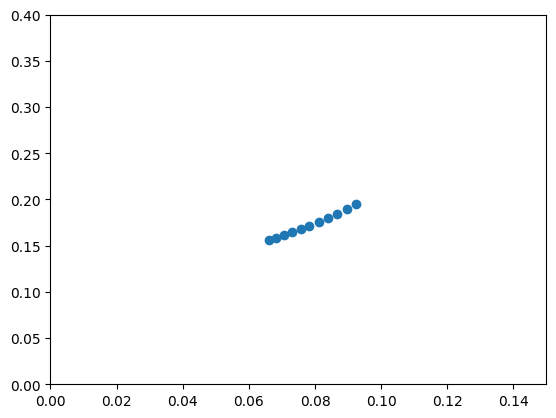

In [6]:
plt.scatter(simulated_S_data[:,0],simulated_S_data[:,1])
plt.xlim(0,0.15)
plt.ylim(0,0.4)